In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sess = tf.InteractiveSession()

Перемножим два целых числа. Например, найдем произведение $5$ и $12$.

In [3]:
a = tf.placeholder('int64', name="input_a")
b = tf.placeholder('int64', name="input_b")
result = a * b

print(sess.run(result, {a: 5, b: 12}))

60


## Линейная регрессия

Решим задачу восстановления коэффициентов зашумленного многочлена. Поскольку в лабораторной не сказано, какие именно данные генерировать, возьмем для примера квадратичную функцию $y = x^2 + x + 1$ и, зная ее чуть зашумленные значения на отрезке $[0,1]$, попробуем предсказать ее поведение на отрезке $[1, 1.3]$.

In [5]:
# плейсхолдеры для матрицы признаков и таргета 
input_x = tf.placeholder('float32', shape=[None, 3], name='x')
input_y = tf.placeholder('float32', shape=[None], name='y')

# вектор-переменная для весов (коэффициентов многочлена)
weights = tf.Variable(initial_value=np.random.rand(3, 1) * 0.01, dtype='float32')
sess.run(tf.global_variables_initializer())

# Минимизируем среднеквадратичную функцию потерь. Можно еще добавить регуляризацию,
# но в этой модельной задаче мы этого делать не будем.
# Оптимизируем методом градиентоного спуска.
predicted_y = tf.matmul(input_x, weights)[:, 0]
loss = tf.reduce_mean((input_y - predicted_y) ** 2)
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Задаем 100 точек на отрезке [0, 1]
x = np.linspace(0, 1, 100)
# Добавляем небольшой случайный нормально распределенный шум с дисперсией 0.01
xx = x + 0.01 * np.random.normal(size=100)
# Делаем матрицу признаков. Первый столбец - константный,
# второй состоит из сгенерированных иксов,
# третий - из их квадратов
X_train = np.vstack((np.ones(100), xx, xx ** 2)).T
# Таргет или вектор правильных ответов
y_train = x ** 2 + x + 1

# То же самое, но для теста. Возьмем 30 точек
x = np.linspace(1, 1.3, 30)
X_test = np.vstack((np.ones(30), x, x ** 2)).T

# Обучимся за ~1000 итераций, на каждом 50-м шаге выводя значение функции потерь
for i in range(1001):
    loss_i, _ = sess.run([loss, train_step], {input_x: X_train, input_y: y_train})
    if i % 50 == 0:
        print("loss at iter %i: %.4f" % (i, loss_i))

loss at iter 0: 3.6958
loss at iter 50: 0.2467
loss at iter 100: 0.0416
loss at iter 150: 0.0240
loss at iter 200: 0.0183
loss at iter 250: 0.0144
loss at iter 300: 0.0114
loss at iter 350: 0.0090
loss at iter 400: 0.0072
loss at iter 450: 0.0057
loss at iter 500: 0.0046
loss at iter 550: 0.0037
loss at iter 600: 0.0031
loss at iter 650: 0.0025
loss at iter 700: 0.0021
loss at iter 750: 0.0018
loss at iter 800: 0.0016
loss at iter 850: 0.0014
loss at iter 900: 0.0012
loss at iter 950: 0.0011
loss at iter 1000: 0.0010


Предскажем значения на тесте:

In [6]:
predicted_values = sess.run(predicted_y, {input_x: X_test})

In [7]:
predicted_values

array([ 2.95760393,  2.98708153,  3.01675177,  3.04661489,  3.07667065,
        3.10691905,  3.13735986,  3.16799355,  3.19881964,  3.22983837,
        3.26104999,  3.29245424,  3.32405138,  3.35584092,  3.3878231 ,
        3.41999793,  3.4523654 ,  3.48492551,  3.51767874,  3.55062389,
        3.58376217,  3.61709309,  3.65061665,  3.68433285,  3.71824145,
        3.75234318,  3.78663707,  3.82112408,  3.85580373,  3.89067578], dtype=float32)

Посмотрим на графике как предсказанные значения отличаются от настоящих:

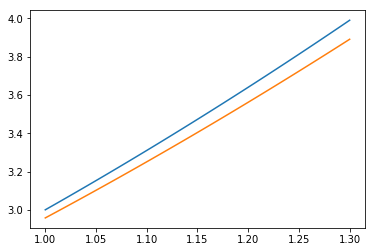

In [8]:
x = np.linspace(1,1.3,30)
plt.plot(x, x ** 2 + x + 1, x, predicted_values)

Выведем веса, которые выучила модель. Они должны быть близки к единицам (коэффициентам полинома, который мы восстанавливали).

In [9]:
print(weights.eval())

[[ 1.01756108]
 [ 1.03989255]
 [ 0.90015042]]


## Логистическая регрессия

Если в предыдущем задании мы решали задачу регрессии (т.е. таргет был непрерывен), то с помощью логистической регрессии мы решим задачу классификации (таргет принадлежит одному из двух классов). Cгенерируем $100$ точек на плоскости из двух нормальных распределений (график внизу). Разобьем выборку на train и test. Обучим логистическую регрессию на трейне и предскажем классы для теста.  

In [11]:
from sklearn.datasets import  make_blobs
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [12]:
X, y = make_blobs(centers=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

NameError: name 'make_blobs' is not defined

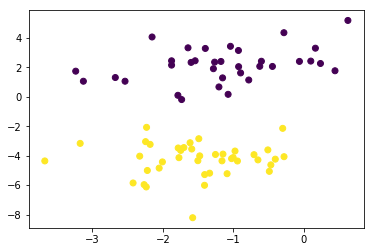

In [94]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [97]:
# плейсхолдеры для матрицы признаков и таргета 
input_x = tf.placeholder('float32', shape=[None, 2], name='x')
input_y = tf.placeholder('float32', shape=[None], name='y')

# вектор-переменная для весов
weights = tf.Variable(initial_value=np.random.rand(2, 1) * 0.01, dtype='float32')
sess.run(tf.global_variables_initializer())

# Минимизируем кросс-энтропию (функция потерь для бинарной классификации)
predicted_y_proba = tf.nn.sigmoid(tf.matmul(input_x, weights))[:, 0]
loss = -tf.reduce_mean(input_y * tf.log(predicted_y_proba) + (1 - input_y) * tf.log(1 - predicted_y_proba))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Обучимся за ~1000 итераций, на каждом 50-м шаге выводя значение функции потерь
for i in range(1001):
    loss_i, _ = sess.run([loss, train_step], {input_x: X_train, input_y: y_train})
    if i % 100 == 0:
        print("loss at iter %i: %.4f" % (i, loss_i))

loss at iter 0: 0.7044
loss at iter 100: 0.1585
loss at iter 200: 0.1035
loss at iter 300: 0.0804
loss at iter 400: 0.0671
loss at iter 500: 0.0584
loss at iter 600: 0.0521
loss at iter 700: 0.0473
loss at iter 800: 0.0435
loss at iter 900: 0.0404
loss at iter 1000: 0.0378


In [98]:
predicted_values = sess.run(predicted_y_proba, {input_x: X_test})

Видим, что предсказанные значения близки к меткам класса

In [99]:
predicted_values

array([0.00262796, 0.00138683, 0.99750024, 0.00614398, 0.99985194,
       0.9948474 , 0.03115384, 0.01185352, 0.06539909, 0.98903614,
       0.02333163, 0.00295362, 0.03396957, 0.00563063, 0.0207144 ,
       0.03848543, 0.02830145, 0.99701035, 0.02165363, 0.98881257,
       0.98697996, 0.99360305, 0.0167891 , 0.02871286, 0.99119145],
      dtype=float32)

In [100]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

График с предсказанными значениями и график с настоящими значениями. Видим, что они не отличаются

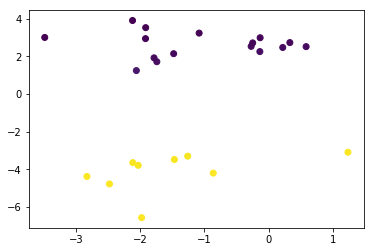

In [102]:
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_values)

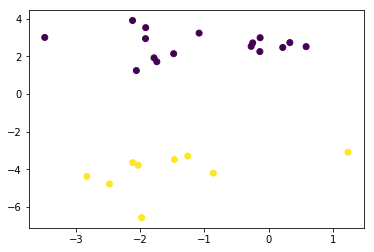

In [103]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

## Простейший нейрон

In [73]:
x = tf.constant(1.0, name='input')
w = tf.Variable(1.0, name='weight')
y = tf.multiply(w, x, name='output')
y_ = tf.constant(0.0, name='correct_value')
loss = tf.pow(y - y_, 2, name='loss')
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
sess.run(tf.global_variables_initializer())

print('before training y is ', y.eval())

for i in range(101):
    loss_i, _ = sess.run([loss, train_step], {input_x: X_train, input_y: y_train})
    if i % 10 == 0:
        print("loss at iter %i: %.4f" % (i, loss_i))
        
        
print('after training y is ', y.eval())

before training y is  1.0
loss at iter 0: 1.0000
loss at iter 10: 0.3585
loss at iter 20: 0.1285
loss at iter 30: 0.0461
loss at iter 40: 0.0165
loss at iter 50: 0.0059
loss at iter 60: 0.0021
loss at iter 70: 0.0008
loss at iter 80: 0.0003
loss at iter 90: 0.0001
loss at iter 100: 0.0000
after training y is  0.005624503


In [74]:
print(y.eval())

0.005624503
